# KNN Lab

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score as accuracy
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics

## Downloading Data Set

In [15]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

pd.DataFrame(X, columns=iris['feature_names'][:2]).head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


The Iris data set that describes the 3 different types of Iris flowers which are Iris Setosa, Iris Versocolour, and Iris Virginica. There are then 4 columns that describe each of these flowers which are the sepal length and width in centimeters and the petal length and width in centimeters. The data set is separated by 150 rows and 5 columns. However, in order to visualize this dataset into a 2-dimensional space, I am only going to base this model based soley on the sepal length and width. What we are trying to predict is the class of the iris flower based on the different attributes of it like the sepal's length and width.

## Splitting Data Set

In [22]:
test_percent = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_percent)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

# Creating KNN Model

In [17]:
#classifier = KNeighborsClassifier(n_neighbors=5)  

## Training model using Scikit learn KNN

In [23]:
 for k in range(1,21,2):
    classifier = KNeighborsClassifier(n_neighbors=k)  

    classifier.fit(X_train, y_train)  

    y_pred = classifier.predict(X_test)  

    print("Accuracy for k =", k, " is:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy for k = 1  is: 0.7555555555555555
Accuracy for k = 3  is: 0.8888888888888888
Accuracy for k = 5  is: 0.7777777777777778
Accuracy for k = 7  is: 0.8444444444444444
Accuracy for k = 9  is: 0.8
Accuracy for k = 11  is: 0.8222222222222222
Accuracy for k = 13  is: 0.8
Accuracy for k = 15  is: 0.7333333333333333
Accuracy for k = 17  is: 0.8
Accuracy for k = 19  is: 0.8222222222222222


In [6]:
#print(confusion_matrix(y_test, y_pred))  
#print(classification_report(y_test, y_pred))  

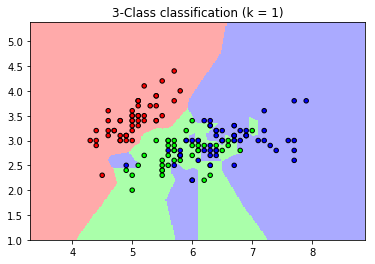

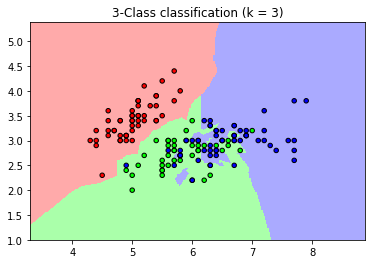

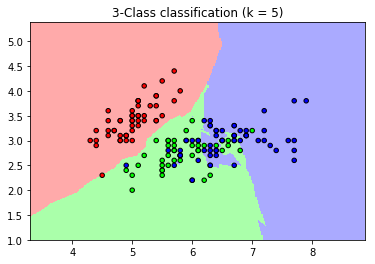

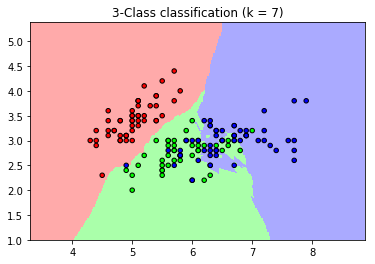

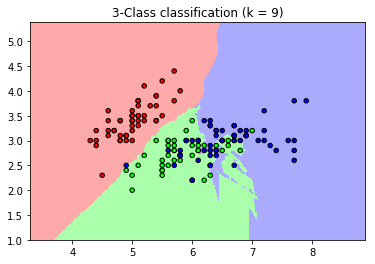

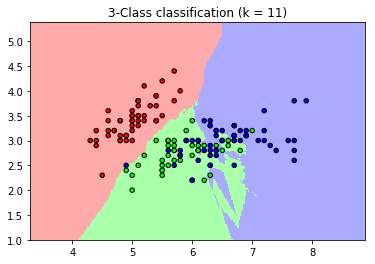

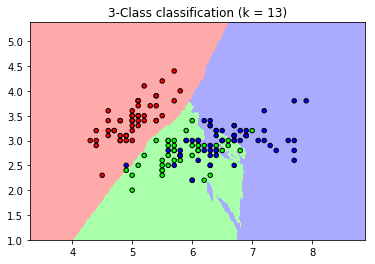

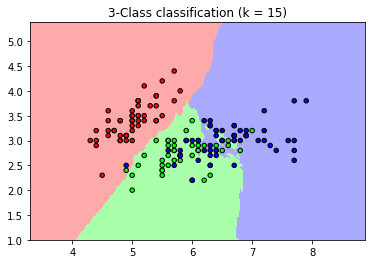

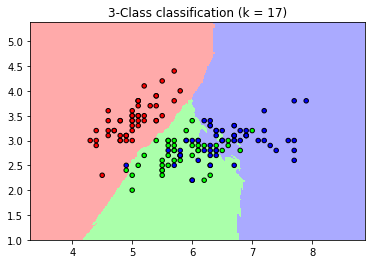

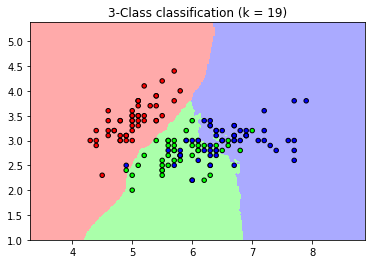

In [24]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 21
h = .02  # step size in the mesh

for k in range(1, n_neighbors,2):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (k))

plt.show()

## Calculating Error

In [25]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

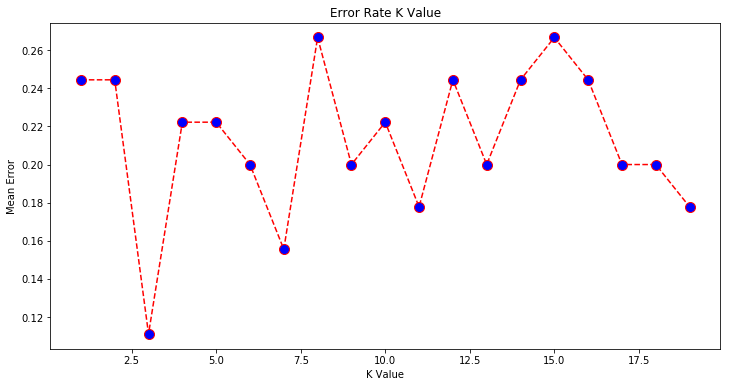

In [26]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

## Choosing K Value

Selecting the correct K value using the KNN model needs to be selected very carefully because the k value you use, the model could be either overfitting or underfitting. Normally, when choosing a k value that is low like 1, results in overfitting. Then a k value that is equal to n results in underfitting the data set. We have to select a value of k that is in between this, and should give us this optimal value where we are neither overfitting or underfitting. In the case for this secific training and test set one of the more accurate k values is 3 because the accuracy was %88. In addition, looking at the error rates bectween the different k values it is easily noticeable that the lowest error was a k value was around 3.

## KNN by Hand

In [10]:
# pick k
k = 5 # k of 5 means there will be no ties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1)
storage = []

# iterate through the test set
for test_index in range(len(X_test)):
    
    # take the current item in the test set
    x_test_point = X_test[test_index] # we want to find the nearest neighbor to this point
    
    # initialize list for storing distance and prediction
    storage = []
    
    # iterate through the training points to find the nearest neighbor
    for train_index in range(len(X_train)):
        
        # get x: the input
        x_neighbor = X_train[train_index]
        
        # get y the possible prediction 
        y_neighbor = y_train[train_index]
        
        # compute distance between the points (what distance did we talk about in class?)
        # dist(x_neighbor, x_test_point) 
        # distance = pdist(x_neighbor, x_test_point, 'euclidean')
        distance = np.sqrt(np.sum(np.square(X_test - X_train[train_index, :])))
        
        
        # save distance (Why are we saving two things here?) Saving two things here so we can use them for later to give classifcation
        storage.append([distance, y_neighbor]) # here y_neighbor would be the prediction if x_neighbor is chosen as a close point
        
    # sort storage by the first index of each list ~ the index where we stored the distance
    storage = sorted(storage)
    
    # take the k closest neighbors and use them to decide which class the flower will be bwo voting
    listofneighbors = []
    flower0 = 0
    flower1 = 0 
    flower2 = 0
    #prediction = 0
    listofneighbors.append(storage[0][1])
    listofneighbors.append(storage[1][1])
    listofneighbors.append(storage[2][1])
    listofneighbors.append(storage[3][1])
    listofneighbors.append(storage[4][1])
    print(listofneighbors)
    
    flowers = [0,0,0]
    for i in listofneighbors:
        flowers[listofneighbors[i]] += 1
        
    print("Flower0 count: ", flowers[0])
    print("Flower1 count: ", flowers[1])
    print("Flower2 count: ", flowers[2])
    
    
    prediction = np.argmax(flowers)
    prediction == y_test[test_index] 
    print("Prediction is: ", prediction) 
    print("Actual Value is: ", y_test[test_index])
    print(prediction == y_test[test_index])
    
    break #Flower number 3 wins
    # check if the prediction is correct
    #if #find percent prediction == y_test[test_index] 
    
#find percent

[1, 1, 2, 2, 2]
Flower0 count:  0
Flower1 count:  2
Flower2 count:  3
Prediction is:  2
Actual Value is:  0
False


Looking at when a k-value is equal to 5, this specific instance do not produce a correct outcome. If we were to continually repeat this process, we should have recieved a fairly decent accuracy. I normally would reccommend a value between 3-9 neighbors because in this case we are neither overfitting or underfitting the data set. 

## Cross-Validation

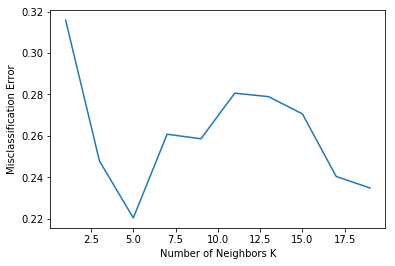

In [28]:
myList = list(range(1,21,2))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
#optimal_k = neighbors[MSE.index(min(MSE))]
#print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The optimal number of k neighbors doing a 10 fold cross validation is around 5 neighbors. This is because when the number of k neighbors is 5 it has one of the lowest mean square error.

## Statement of Collaboration

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In addition to using these website to help me complete this project, I worked with Matt and Tucker on this lab. 